<a href="https://colab.research.google.com/github/bhaskarahanuma/Quantitative-and-Qualitative-Financial-Analytics/blob/main/Financial_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install statsmodels --upgrade
%pip install yfinance

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


# **Importing Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy.random as nrand
import pandas_datareader.data as wb
import scipy.optimize as sco
import seaborn as sns
import datetime

# **Cash Conversion Cycle:DSO,DPO,DIO**
Cash conversion cycle can be defined as time required for a comapny to convert its assets into cash.


In [ ]:
def dio(average_inventory,cost_of_goods_sold):
  return (average_inventory/cost_of_goods_sold)*365
def dso(recievables,credit_sales):
  return(recievables/credit_sales)*365
def dpo(accounts_payable,cost_of_goods_sold):
  return(accounts_payable/cost_of_goods_sold)*365
def ccc(dio,dso,dpo):
  return dio+dso-dpo

# **Simple and Compund interests**
 Its fascinating that no package gives these functions.
These can be further developed by extending the calculations of compund interest anualy and quarterly.

In [ ]:
def s_and_c(principal_amount,total_time,interest_rate):
  principal = float(principal_amount)
  time = float(total_time)
  rate = float(interest_rate)

  simple_interest = (principal*time*rate)/100
  compound_interest = principal * ( (1+rate/100)**time - 1)

  print('Simple interest is: %f' % (simple_interest))
  print('Compound interest is: %f' %(compound_interest))
#s_and_c(10000,2,3)



# **ACF**, **MA**, **LAG**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


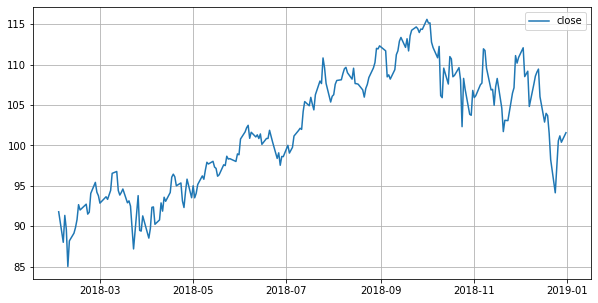

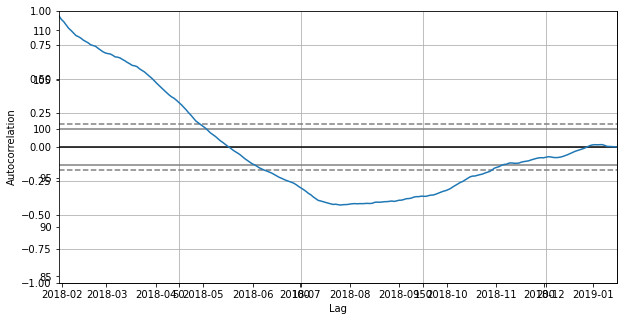

In [ ]:

def acf_plot(org,start,end):
  df=data_download(org,start,end)
  
  series = df['Close']
  
  autocorrelation_plot(series)
  
  
  pyplot.show()

df=data_download("MSFT","2018-02-02","2019-01-01")
  
series = df['Close']
plt.figure(figsize=[10,5])
plt.grid(True)
plt.plot(series,label='close')
plt.legend()

def moving_average(org,start,end,window):
    df = data_download(org,start,end)
    adj_close_px = df['Adj Close']
    moving_avg = adj_close_px.rolling(window=window).mean()
    plt.figure(figsize=[10,5])
    plt.grid(True)
    plt.plot(moving_avg,label='moving averages')
    plt.legend()
    return moving_avg

def lag(org,start,end):
    df = data_download(org,start,end)
    series = df['Close']
    lag_plot(series)
    pyplot.show()
moving_average("MSFT","2018-02-02","2019-01-01",10)
acf_plot("MSFT","2018-02-02","2019-01-01")

# **Auto Regression Model**

[*********************100%***********************]  1 of 1 completed
predicted=140.366757, expected=141.806152
predicted=145.876428, expected=141.413467
predicted=145.332654, expected=141.609802
predicted=146.769789, expected=143.278595
predicted=148.095044, expected=143.425797
predicted=148.273583, expected=144.368195
predicted=149.376812, expected=144.603790
predicted=149.612055, expected=145.339981
predicted=150.407500, expected=147.214905
predicted=152.029058, expected=147.578125
predicted=152.491891, expected=147.627197
predicted=152.888496, expected=147.371078
predicted=152.742777, expected=147.233200
predicted=152.633736, expected=147.341553
predicted=152.674875, expected=148.956894
predicted=154.002187, expected=149.744873
predicted=154.699935, expected=150.030518
predicted=155.250590, expected=149.104645
predicted=154.626580, expected=147.302139
predicted=153.161245, expected=147.065750
predicted=152.769807, expected=147.597626
predicted=152.874411, expected=147.676453
predict

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


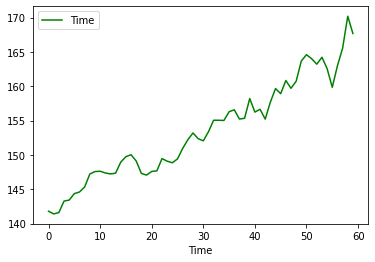

In [ ]:
def armodel(org,start,end,window):
    df = data_download(org,start,end)
    series = df['Adj Close']
    X = series.values
    train, test = X[1:len(X) - 100], X[len(X) - 60:]
    # train autoregression
    model = AutoReg(train, lags=100)
    model_fit = model.fit()
    coef = model_fit.params
    # walk forward over time steps in test
    history = train[len(train) - window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length - window, length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d + 1] * lag[window - d - 1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    plt.plot(test,color='green',label="Time")
    #pyplot.plot(test)
    #pyplot.plot(predictions, color='green',label="Time")
    #pyplot.show()
    plt.xlabel("Time")
    plt.legend()
armodel("MSFT","2016-02-02","2020-02-02",3)

# **Internal Rate of Return: Automation**
With number of intervals and initial investment this function returns Internal rate of return which can be used for further analysis.
A financial rule states that if IRR is greater than minimum required return then action over that project/organisation/stock can be pursued.
Though IRR alone cannot be used to judge the value.

In [ ]:
def internal_rate_return(number_of_intervals,investment):
  number=number_of_intervals
  invest=investment
  withdrawls=[]
  for i in range(number):
    x=int(input("Please enter the withdrawl for interval %d"%i))
    withdrawls.append(x)
  withdrawls.insert(0,-investment)
  returns=np.irr(withdrawls)
  print(returns)

  
internal_rate_return(
    3,500)
  


Please enter the withdrawl for interval 010
Please enter the withdrawl for interval 1100
Please enter the withdrawl for interval 21000
0.31977480705344963


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  if __name__ == '__main__':


# **Net Present Value: Calculation and Anaysis**.
Here we pass number of cashflows needed and discount rate.
A Value i.e., Net Present Value is given as output with some analytical statement.

In [ ]:
def net_pv(number,discount_rate):
  number_of_cashflows=number
  cashflow_set=[]
  for i in range(number):
    x=int(input("Please enter the cashflows for time %d"%i))
    cashflow_set.append(x)
  rate=discount_rate
  Net_Present_Value=np.npv(rate,cashflow_set)
  print("Net present value for the investment is %d"%Net_Present_Value)
  if(Net_Present_Value<0):
    print("Project is expected to result in a net loss for the company")
  elif(Net_Present_Value==0):
    print("Project is expected to result in a neutral mode for the company")
  else:
    print("Project is expected to result in a net gain for the company")

# **Volatility :**
Volatility measures the stability of a company.
Stock of a company should be less volatile in nature.

---


Input to pass here is comapny code and we can get volatility values and a graph representing it


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Log_Ret,Volatility
Date,,,,,,,,
2016-02-02,784.500000,789.869995,764.650024,764.650024,764.650024,6348100,NaN,NaN
2016-02-03,770.219971,774.500000,720.500000,726.950012,726.950012,6171000,-0.050561,NaN
2016-02-04,722.809998,727.000000,701.859985,708.010010,708.010010,5168700,-0.026399,NaN
2016-02-05,703.869995,703.989990,680.150024,683.570007,683.570007,5105700,-0.035129,NaN
2016-02-08,667.849976,684.030029,663.059998,682.739990,682.739990,4247400,-0.001215,NaN
...,...,...,...,...,...,...,...,...
2021-01-26,1888.839966,1925.000000,1884.244995,1917.239990,1917.239990,1313100,0.009349,0.389200
2021-01-27,1882.530029,1890.000000,1809.000000,1830.790039,1830.790039,2748300,-0.046139,0.391879
2021-01-28,1843.939941,1898.829956,1842.640015,1863.109985,1863.109985,1773100,0.017500,0.392217


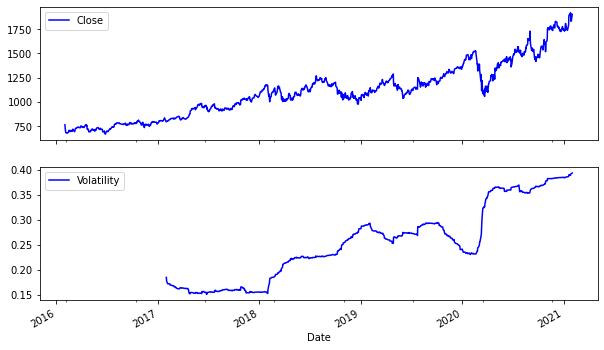

In [ ]:
def volatility(org,start_date,end_date):
  data = data_download(org,start=start_date,end=end_date)
  data['Log_Ret'] = np.log(data['Close'] / data['Close'].shift(1))
  data['Volatility'] = data['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
  data[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(10, 6))
  return data
volatility("GOOG","2016-02-02","2021-02-02")




# **Spread**

Calculates spread

In [ ]:
def spread(org,start_date,end_date):
    df = data_download(org, start=start_date, end=end_date)
    col1 = df['High']
    col2 = df['Low']
    spread = []
    for i in range(len(col1)):
        s = col1[i] - col2[i]
        spread.append(s)
    print("spread is:", spread)
spread("GOOG","2016-02-02","2019-02-02")

[*********************100%***********************]  1 of 1 completed
spread is: [25.219970703125, 54.0, 25.1400146484375, 23.8399658203125, 20.97003173828125, 31.1300048828125, 19.17999267578125, 20.48199462890625, 15.1500244140625, 12.95001220703125, 18.3699951171875, 16.3199462890625, 9.031005859375, 10.72998046875, 14.82000732421875, 19.219970703125, 15.39495849609375, 12.57000732421875, 13.21002197265625, 19.03997802734375, 8.0, 13.42999267578125, 10.469970703125, 21.19097900390625, 18.449951171875, 11.67999267578125, 13.08001708984375, 9.79498291015625, 10.3499755859375, 7.51995849609375, 12.9599609375, 7.07000732421875, 10.16998291015625, 8.9840087890625, 7.53997802734375, 9.5699462890625, 6.74700927734375, 6.489990234375, 18.489990234375, 9.1400146484375, 9.90997314453125, 13.34002685546875, 10.3699951171875, 7.42999267578125, 10.67999267578125, 10.719970703125, 9.9000244140625, 8.95001220703125, 12.82000732421875, 10.1190185546875, 4.60498046875, 8.3060302734375, 10.75, 20.5700

# **Daily,Monthly,Quarterly Returns**

In [ ]:
def data_download(org,start,end):
    from pandas_datareader import data as pdr
    import yfinance as yf
    yf.pdr_override()
    df = pdr.get_data_yahoo(org, start=start, end=end)
    return df


def daily_returns(org,start,end):
    df =data_download(org,start,end)
    daily_close = df['Adj Close']
    daily_pct_change = daily_close.pct_change()
    daily_pct_change.fillna(0, inplace=True)
    daily_log_returns = np.log(daily_close.pct_change() + 1)
    daily_log_returns.fillna(0, inplace=True)
    return daily_log_returns

def monthly_returns(org,start,end):
    df=data_download(org, start=start, end=end)
    monthly = df.resample('BM').apply(lambda x: x[-1])
    monthly_log_returns = np.log(monthly.pct_change() + 1)
    return monthly_log_returns

def quarterly_returns(org,start,end):
    df=data_download(org, start=start, end=end)
    quarter = df.resample("4M").mean()
    quarterly_log_returns = np.log(quarter.pct_change() + 1)
    return quarterly_log_returns
data_download("GOOG","2016-01-01","2019-02-02")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700
2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900
...,...,...,...,...,...,...
2019-01-28,1080.109985,1083.000000,1063.800049,1070.079956,1070.079956,1284300
2019-01-29,1072.680054,1075.150024,1055.864990,1060.619995,1060.619995,1021800
2019-01-30,1068.430054,1091.000000,1066.849976,1089.060059,1089.060059,1279800


# **Financial Ratios**

In [ ]:
 #EPS Ratio
def eps(net_income,shares_outstanding):
  return net_income/shares_outstanding

#P/E Ratio
def p_by_e(market_cap,net_income,shares_outstanding):
  return market_cap/eps(net_income,shares_outstanding)
p_by_e(2345543,12333324,234)

#PEG Ratio
def peg_ratio(market_cap,net_income,shares_outstanding,growth):
  return p_by_e(market_cap, net_income, shares_outstanding)/growth

#Market Value Per Share
def mrkt_value_pershare(market_cap,net_income,shares_outstanding):
  return p_by_e(market_cap, net_income, shares_outstanding)*eps(net_income,shares_outstanding)

#Book Value Per Share
def book_value_pershare(equity,shares_outstanding):
  return equity/shares_outstanding
  
#Market to Book Ratio
def mrkt_to_book(market_cap,net_income,shares_outstanding,equity):
  return mrkt_value_pershare(market_cap,net_income,shares_outstanding)/book_value_pershare(equity,shares_outstanding)

#Dividend pay out ratio
def div_pay_out(dividend_per_share,net_income,shares_outstanding):
  return dividend_per_share/eps(net_income,shares_outstanding)

#Dividend Yield Ratio
def div_yeild(dividend_per_share,market_cap,net_income,shares_outstanding):
  return dividend_per_share/mrkt_value_pershare(market_cap,net_income,shares_outstanding)

#Return On Assets
def roa(net_income,total_assets):
  return net_income/total_assets

#Return on Equity
def roe(net_income,avg_total_equity):
  return net_income/avg_total_equity

#Return on Sales
def ros(net_income,net_sales):
  return net_income/net_sales

#Gross Profit Margin
def gpa(gross_profit,net_sales):
  return gross_profit/net_sales

#Net Profit Margin
def npm(net_income,total_tax,net_sales):
  return (net_income-total_tax)/net_sales

#Current Ratio
def current(current_assets,current_liabilities):
  return current_assets/current_liabilities

#Acid Test Ratio
def acid_test(quick_assets,current_liabilities):
  return quick_assets/current_liabilities

#Cash Ratio
def cash_ratio(cash,securities,current_liabilities):
  return (cash+securities)/current_liabilities

#Recievable Turnover
def recievable(net_credit_sales,avg_acc_recble):
  return net_credit_sales/avg_acc_recble

#Days Sales Outstanding
def dso(net_credit_sales,avg_acc_recble):
  return 360/recievable(net_credit_sales,avg_acc_recble)

#Inventory Turnover
def inventory(cost_of_sales,avg_inventory):
  return cost_of_sales/avg_inventory

#Days Inventory Outstanding
def dio(cost_of_sales,avg_inventory):
  return 360/inventory(cost_of_sales,avg_inventory)

#Payable Turnover
def payable(net_credit_purchase,avg_acc_payable):
  return net_credit_purchase/avg_acc_payable

#Days Payable Outstanding 
def dpo(net_credit_purchase,avg_acc_payable):
  return 360/payable(net_credit_purchase,avg_acc_payable)

#Cash Conversion Cycle
def ccc(net_credit_sales,avg_acc_recble,cost_of_sales,avg_inventory,net_credit_purchase,avg_acc_payable):
  return dso(net_credit_sales,avg_acc_recble)+dio(cost_of_sales,avg_inventory)-dpo(net_credit_purchase,avg_acc_payable)

#Debt Ratio
def debt_ratio(total_liabilities,total_assets):
  return total_liabilities/total_assets

#Equity Ratio
def equity_ratio(total_equity,total_assets):
  return total_equity/total_assets

#Debt to Equity Ratio
def debt_to_equity(total_liabilities,total_equity):
  return total_liabilities/total_equity

#Altman Z Score
def altman(working_cap,retained_earnings,earning_before_tax,mrkt_valueof_equity,total_sales,total_liabilities,total_assets):
  A=working_cap/total_assets
  B=retained_earnings/total_assets
  C=earning_before_tax/total_assets
  D=mrkt_valueof_equity/total_liabilities
  E=total_sales/total_assets
  Zeta=1.2(A) + 1.4(B) + 3.3(C) + 0.6(D) + 1.0(E)
  return Zeta


#Beta of the market 
def beta(returns, market):
    matrix = np.matrix([returns, market])
    return np.cov(matrix)[0][1] / numpy.var(market)

# Lower Partial momemnt
def lpm(returns, threshold, order):
    # This method returns a lower partial moment of the returns
    # Create an array he same length as returns containing the minimum return threshold
    threshold_array = numpy.empty(len(returns))
    threshold_array.fill(threshold)
    # Calculate the difference between the threshold and the returns
    diff = threshold_array - returns
    # Set the minimum of each to 0
    diff = diff.clip(min=0)
    # Return the sum of the different to the power of order
    return numpy.sum(diff ** order) / len(returns)

#Higher Partial Moment
def hpm(returns, threshold, order):
    # This method returns a higher partial moment of the returns
    # Create an array he same length as returns containing the minimum return threshold
    threshold_array = numpy.empty(len(returns))
    threshold_array.fill(threshold)
    # Calculate the difference between the returns and the threshold
    diff = returns - threshold_array
    # Set the minimum of each to 0
    diff = diff.clip(min=0)
    # Return the sum of the different to the power of order
    return numpy.sum(diff ** order) / len(returns)


#Treynor Ratio  
def treynor_ratio(expected_return, returns, market, risk_free_rate):
    return (expected_return - risk_free_rate) / beta(returns, market)

#Sharpe Ratio
def sharpe_ratio(er, returns, rf):
    return (expected_return - risk_free_rate) / np.std(returns)

#Information Ratio
def information_ratio(returns, benchmark,tracking_error):
  return (returns-benchmark)/tracking_error

#Modigliani Ratio
def modigliani_ratio(expected_return, returns, benchmark, risk_free_rate):
    np_rf = np.empty(len(returns))
    np_rf.fill(risk_free_rate)
    rdiff = returns - np_rf
    bdiff = benchmark - np_rf
    return (expected_return - risk_free_rate) * (numpy.std(rdiff) / numpy.std(bdiff)) + risk_free_rate

#Omega Ratio
def omega_ratio(expected_return, returns, risk_free_rate, target=0):
    return (expected_return - risk_free_rate) / lpm(returns, target, 1)

#Sortino Ratio
def sortino_ratio(expected_return, returns, risk_free_rate, target=0):
    return (expected_return - risk_free_rate) / math.sqrt(lpm(returns, target, 2))

#Kappa 3 Ratio
def kappa_three_ratio(expected_return, returns, risk_free_rate, target=0):
    return (expected_return - risk_free_rate) / math.pow(lpm(returns, target, 3), float(1)/3)

#Gain loss ratio
def gain_loss_ratio(returns, target=0):
    return hpm(returns, target, 1) / lpm(returns, target, 1)

#Upside Potential Ratio
def upside_potential_ratio(returns, target=0):
    return hpm(returns, target, 1) / math.sqrt(lpm(returns, target, 2))

